In [110]:
#prepare data for long term short memory
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [111]:
server = 'tcp:illidan.database.windows.net' 
database = 'Traffic_Pollution' 
username = 'silax' 
password = 'Polska0!'  
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()
createQuery = '''
DROP TABLE IF EXISTS dbo.RowProcessing
SELECT identity(int,1,1) AS CID, [_datetime], [id], [_value], ROW_NUMBER() Over (Partition By [_datetime] Order By [_datetime]) As RowID
into dbo.RowProcessing
FROM [dbo].[Readings]
WHERE id IN (2766, 2768, 2770, 2774, 17896)
	AND [_datetime] > \'2020-09-30 13:00:00.000\'
	ORDER BY [_datetime], [id]'''

cursor.execute(createQuery)
cursor.commit()

In [186]:
# server = 'myserver,port' # to specify an alternate port
# select 26 rows from SQL table to insert in dataframe.
# 93 vs 98 
query = '''
SELECT fp.[_datetime] 
      ,fp.[_value] AS NO2
	  ,o3.[_value] AS O3	  
	  ,pm10.[_value] AS PM10
	  ,so2.[_value] AS SO2
	  ,c6h6.[_value] AS C6H6
	  , ff.[Speed_Uncapped]/ff.[Free_Flow] AS [Difference]
      , ff.[Jam_Factor]
FROM dbo.RowProcessing as fp
LEFT JOIN dbo.RowProcessing AS c6h6 ON fp.[_datetime] = c6h6.[_datetime] AND c6h6.RowID = 5
LEFT JOIN dbo.RowProcessing AS o3 ON fp.[_datetime] = o3.[_datetime] AND o3.RowID = 2
LEFT JOIN dbo.RowProcessing AS pm10 ON fp.[_datetime] = pm10.[_datetime] AND pm10.RowID = 3
LEFT JOIN dbo.RowProcessing AS so2 ON fp.[_datetime] = so2.[_datetime] AND so2.RowID = 4
   LEFT JOIN dbo.FactFlow AS ff ON fp.[_datetime] = ff.[Timestamp] AND ff.[Station] = 401 
  AND ff.[StreetKey] = 93
  WHERE fp.RowID = 1
''' 

df = pd.read_sql(query, cnxn, parse_dates=['_datetime'],index_col='_datetime')

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

print(df.tail(26))

                      NO2    O3   PM10   SO2  C6H6  Difference  Jam_Factor
_datetime                                                                 
2020-11-11 02:00:00  12.0  16.0   20.0   2.0   1.0         NaN         NaN
2020-12-18 08:00:00  26.0   4.0   35.0  11.0   1.0         NaN         NaN
2020-12-14 19:00:00  16.0  32.0   31.0   6.0   1.0         NaN         NaN
2020-11-21 03:00:00  27.0  18.0   64.0   5.0   1.0         NaN         NaN
2020-11-25 13:00:00  63.0  11.0   59.0   5.0   2.0         NaN         NaN
2021-02-14 18:00:00   NaN   NaN    NaN   NaN   NaN         NaN         NaN
2020-12-12 21:00:00  26.0  10.0   42.0   4.0   2.0         NaN         NaN
2020-12-14 22:00:00  19.0  21.0   53.0   5.0   2.0         NaN         NaN
2020-11-25 14:00:00  50.0  18.0   77.0   8.0   0.0         NaN         NaN
2020-11-21 09:00:00  26.0  24.0   36.0   6.0   1.0         NaN         NaN
2020-11-21 06:00:00  31.0  11.0   66.0   6.0   2.0         NaN         NaN
2020-12-12 22:00:00  27.0

In [28]:
df.to_csv(r'C:\Users\karol\Downloads\File Name.csv', index = False)

In [187]:
df.head()

,NO2,O3,PM10,SO2,C6H6,Difference,Jam_Factor
_datetime,,,,,,,
2021-02-14 09:00:00,16.0,56.0,27.0,12.0,NaN,1.235742,0.0
2021-02-14 10:00:00,15.0,58.0,24.0,11.0,0.0,1.237187,0.0
2021-02-14 11:00:00,15.0,59.0,25.0,11.0,0.0,1.205973,0.0
2021-02-14 12:00:00,15.0,60.0,26.0,12.0,0.0,1.086898,0.0
2021-02-14 13:00:00,16.0,61.0,28.0,11.0,0.0,1.205202,0.0


In [188]:
df.isnull().sum()

NO2           10
O3            10
PM10           6
SO2           10
C6H6          38
Difference    28
Jam_Factor    28
dtype: int64

In [189]:
df.head()

,NO2,O3,PM10,SO2,C6H6,Difference,Jam_Factor
_datetime,,,,,,,
2021-02-14 09:00:00,16.0,56.0,27.0,12.0,NaN,1.235742,0.0
2021-02-14 10:00:00,15.0,58.0,24.0,11.0,0.0,1.237187,0.0
2021-02-14 11:00:00,15.0,59.0,25.0,11.0,0.0,1.205973,0.0
2021-02-14 12:00:00,15.0,60.0,26.0,12.0,0.0,1.086898,0.0
2021-02-14 13:00:00,16.0,61.0,28.0,11.0,0.0,1.205202,0.0


In [190]:
dfnn = df.fillna(0)

In [191]:
dfnn.describe()

,NO2,O3,PM10,SO2,C6H6,Difference,Jam_Factor
count,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000
mean,30.026061,18.080000,37.823939,5.893030,1.063636,0.963261,1.170971
std,17.726149,17.501733,27.549942,4.211851,1.215071,0.190131,1.475406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,3.000000,18.000000,3.000000,0.000000,0.857900,0.000000
50%,27.000000,11.000000,32.000000,5.000000,1.000000,0.955940,0.599060
75%,39.000000,31.000000,50.000000,7.000000,2.000000,1.079356,2.069867
max,156.000000,80.000000,169.000000,50.000000,6.000000,1.621484,9.742690


In [192]:
dfnn.isnull().sum().sum()

0

In [193]:
hour_df = dfnn.sum()
hour_df.head()

NO2      99086.0
O3       59664.0
PM10    124819.0
SO2      19447.0
C6H6      3510.0
dtype: float64

In [194]:
hour_df.shape, dfnn.shape

((7,), (3300, 7))

In [195]:
dfnn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3300 entries, 2021-02-14 09:00:00 to 2020-11-11 03:00:00
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NO2         3300 non-null   float64
 1   O3          3300 non-null   float64
 2   PM10        3300 non-null   float64
 3   SO2         3300 non-null   float64
 4   C6H6        3300 non-null   float64
 5   Difference  3300 non-null   float64
 6   Jam_Factor  3300 non-null   float64
dtypes: float64(7)
memory usage: 206.2 KB


In [196]:
train_df,test_df = dfnn[1:2280], dfnn[2280:]

In [197]:
train_df.shape,test_df.shape

((2279, 7), (1020, 7))

In [200]:

dfnn.describe()

,NO2,O3,PM10,SO2,C6H6,Difference,Jam_Factor
count,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000
mean,30.026061,18.080000,37.823939,5.893030,1.063636,0.963261,1.170971
std,17.726149,17.501733,27.549942,4.211851,1.215071,0.190131,1.475406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,3.000000,18.000000,3.000000,0.000000,0.857900,0.000000
50%,27.000000,11.000000,32.000000,5.000000,1.000000,0.955940,0.599060
75%,39.000000,31.000000,50.000000,7.000000,2.000000,1.079356,2.069867
max,156.000000,80.000000,169.000000,50.000000,6.000000,1.621484,9.742690


In [171]:
train = train_df
scalers={}
for i in train_df.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s
test = test_df
for i in train_df.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s

In [172]:
def split_series(series, n_past, n_future):
  #
  # n_past ==> no of past observations
  #
  # n_future ==> no of future observations 
  #
  X, y = list(), list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future
    if future_end > len(series):
      break
    # slicing the past and future parts of the window
    past, future = series[window_start:past_end, :], series[past_end:future_end, :]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)

In [205]:
n_past = 38
n_future = 7
n_features = 7

In [206]:
X_train, y_train = split_series(train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, y_test = split_series(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))

In [207]:
X_test.shape

(976, 38, 7)

In [208]:
X_test

array([[[-0.61290323, -0.95      , -0.72058824, ..., -1.        ,
          0.33470482, -1.        ],
        [-0.1827957 , -0.65      , -0.57352941, ..., -0.66666667,
          0.50900817, -1.        ],
        [-0.52688172, -0.275     , -0.73529412, ..., -0.66666667,
          0.21114644, -1.        ],
        ...,
        [-0.05376344, -0.9       , -0.55882353, ..., -0.33333333,
          0.45215386, -1.        ],
        [-0.13978495, -0.9       , -0.33823529, ..., -0.33333333,
          0.27697774, -1.        ],
        [-0.1827957 , -0.925     , -0.36764706, ...,  0.        ,
          0.39056169, -1.        ]],

       [[-0.1827957 , -0.65      , -0.57352941, ..., -0.66666667,
          0.50900817, -1.        ],
        [-0.52688172, -0.275     , -0.73529412, ..., -0.66666667,
          0.21114644, -1.        ],
        [-0.74193548,  0.025     , -0.70588235, ..., -0.66666667,
          0.36026432, -1.        ],
        ...,
        [-0.13978495, -0.9       , -0.33823529, ..., -

In [209]:
# E1D1
# n_features ==> no of features at each timestep in the data.
#
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs1[0])
#
decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_outputs1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l1)
#
model_e1d1 = tf.keras.models.Model(encoder_inputs,decoder_outputs1)
#
model_e1d1.summary()

Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 38, 7)]      0                                            
__________________________________________________________________________________________________
lstm_40 (LSTM)                  [(None, 100), (None, 43200       input_14[0][0]                   
__________________________________________________________________________________________________
repeat_vector_13 (RepeatVector) (None, 7, 100)       0           lstm_40[0][0]                    
__________________________________________________________________________________________________
lstm_41 (LSTM)                  (None, 7, 100)       80400       repeat_vector_13[0][0]           
                                                                 lstm_40[0][1]             

In [210]:
# E2D2
# n_features ==> no of features at each timestep in the data.
#
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100,return_sequences = True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
encoder_l2 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]
#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs2[0])
#
decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_l2 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l2)
#
model_e2d2 = tf.keras.models.Model(encoder_inputs,decoder_outputs2)
#
model_e2d2.summary()

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 38, 7)]      0                                            
__________________________________________________________________________________________________
lstm_42 (LSTM)                  [(None, 38, 100), (N 43200       input_15[0][0]                   
__________________________________________________________________________________________________
lstm_43 (LSTM)                  [(None, 100), (None, 80400       lstm_42[0][0]                    
__________________________________________________________________________________________________
repeat_vector_14 (RepeatVector) (None, 7, 100)       0           lstm_43[0][0]                    
___________________________________________________________________________________________

In [211]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)

model_e1d1.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e1d1=model_e1d1.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),batch_size=32,verbose=0,callbacks=[reduce_lr])

model_e2d2.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e2d2=model_e2d2.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),batch_size=32,verbose=0,callbacks=[reduce_lr])

Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 38, 7)]      0                                            
__________________________________________________________________________________________________
lstm_40 (LSTM)                  [(None, 100), (None, 43200       input_14[0][0]                   
__________________________________________________________________________________________________
repeat_vector_13 (RepeatVector) (None, 7, 100)       0           lstm_40[0][0]                    
__________________________________________________________________________________________________
lstm_41 (LSTM)                  (None, 7, 100)       80400       repeat_vector_13[0][0]           
                                                                 lstm_40[0][1]             

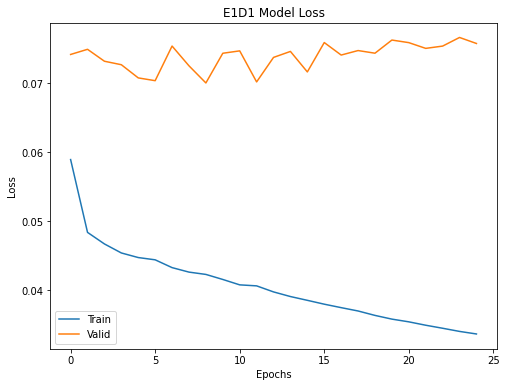

In [212]:
plt.plot(history_e1d1.history['loss'])
plt.plot(history_e1d1.history['val_loss'])
plt.title("E1D1 Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])
plt.show()

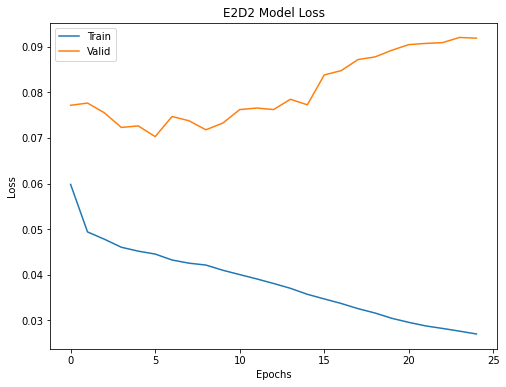

In [213]:
plt.plot(history_e2d2.history['loss'])
plt.plot(history_e2d2.history['val_loss'])
plt.title("E2D2 Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])
plt.show()

In [214]:
pred1_e1d1=model_e1d1.predict(X_test)
pred1_e2d2=model_e2d2.predict(X_test)

pred_e1d1=model_e1d1.predict(X_train)
pred_e2d2=model_e2d2.predict(X_train)

In [225]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


for x, y in dataset_val.take(5):
    show_plot(
        [X_test[0][:, 1].numpy(), y[0].numpy(), pred_e1d1.predict(X_test)[0]],
        12,
        "Single Step Prediction",
    )

NameError: name 'dataset_val' is not defined

In [215]:
for index,i in enumerate(train_df.columns):
    scaler = scalers['scaler_'+i]
    pred1_e1d1[:,:,index]=scaler.inverse_transform(pred1_e1d1[:,:,index])
    pred_e1d1[:,:,index]=scaler.inverse_transform(pred_e1d1[:,:,index])
    
    pred1_e2d2[:,:,index]=scaler.inverse_transform(pred1_e2d2[:,:,index])
    pred_e2d2[:,:,index]=scaler.inverse_transform(pred_e2d2[:,:,index])
    
    y_train[:,:,index]=scaler.inverse_transform(y_train[:,:,index])
    y_test[:,:,index]=scaler.inverse_transform(y_test[:,:,index])

In [216]:
from sklearn.metrics import mean_absolute_error
 
for index,i in enumerate(train_df.columns):
  print(i)
  for j in range(1,6):
    print("Day ",j,":")
    print("MAE-E1D1 : ",mean_absolute_error(y_test[:,j-1,index],pred1_e1d1[:,j-1,index]),end=", ")
    print("MAE-E2D2 : ",mean_absolute_error(y_test[:,j-1,index],pred1_e2d2[:,j-1,index]))
  print()
  print()

NO2
Day  1 :
MAE-E1D1 :  12.203779042744246, MAE-E2D2 :  14.962427805681697
Day  2 :
MAE-E1D1 :  14.481763174787897, MAE-E2D2 :  16.97793169588339
Day  3 :
MAE-E1D1 :  15.457786314800137, MAE-E2D2 :  18.127632332141282
Day  4 :
MAE-E1D1 :  15.75030265968354, MAE-E2D2 :  18.701613036396562
Day  5 :
MAE-E1D1 :  15.897907964518813, MAE-E2D2 :  19.099513627375003


O3
Day  1 :
MAE-E1D1 :  10.91723085720031, MAE-E2D2 :  12.430275213034427
Day  2 :
MAE-E1D1 :  14.316073175336493, MAE-E2D2 :  15.085952863830034
Day  3 :
MAE-E1D1 :  16.406168752029295, MAE-E2D2 :  16.6810335839381
Day  4 :
MAE-E1D1 :  17.60522686458025, MAE-E2D2 :  17.44060655304643
Day  5 :
MAE-E1D1 :  18.25205193533272, MAE-E2D2 :  17.720568134647902


PM10
Day  1 :
MAE-E1D1 :  15.029472680365453, MAE-E2D2 :  17.969698664106307
Day  2 :
MAE-E1D1 :  18.613394704021392, MAE-E2D2 :  22.19385460287821
Day  3 :
MAE-E1D1 :  20.972248307994153, MAE-E2D2 :  25.393325535244628
Day  4 :
MAE-E1D1 :  22.481287740293098, MAE-E2D2 :  27.5

In [217]:
train_df.tail()

,NO2,O3,PM10,SO2,C6H6,Difference,Jam_Factor
_datetime,,,,,,,
2021-01-05 20:00:00,22.0,2.0,28.0,6.0,0.0,0.926301,1.09223
2021-01-05 21:00:00,21.0,3.0,21.0,6.0,0.0,1.123988,0.00000
2021-01-05 22:00:00,18.0,1.0,14.0,6.0,0.0,1.124277,0.00000
2021-01-05 23:00:00,18.0,3.0,12.0,7.0,0.0,0.895761,1.54445
2021-01-06 00:00:00,18.0,2.0,18.0,7.0,0.0,0.905010,1.40665


In [218]:
dfnn.tail()

,NO2,O3,PM10,SO2,C6H6,Difference,Jam_Factor
_datetime,,,,,,,
2020-12-13 06:00:00,31.0,2.0,18.0,8.0,2.0,0.0,0.0
2020-11-21 04:00:00,36.0,7.0,62.0,6.0,1.0,0.0,0.0
2020-11-25 12:00:00,72.0,6.0,110.0,6.0,5.0,0.0,0.0
2020-11-10 02:00:00,8.0,44.0,35.0,3.0,1.0,0.0,0.0
2020-11-11 03:00:00,12.0,16.0,23.0,2.0,1.0,0.0,0.0


In [220]:
pred1_e1d1())

AttributeError: 'numpy.ndarray' object has no attribute 'describe'